# **PROJECT NAME** : **TED talk view predictions**

## **Project Type -** Regression

# Contribution - Team
# Team Member 1 - 23H55A6701
# Team Member 2 - 23H55A6703
# Team Member 3 - 23H55A6704

# Project Summary -
TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated? We aim to perform a comprehensive analysis of over 2500 TED talks to determine what it is that makes an idea powerful.Write the summary here within 150-200 words. We measure our results based on views, comments, and positive ratings.

Views: What gets people to hear an idea? Positive Ratings: What makes people react positively to the idea? Comments: What kinds of ideas produce discussions?

# Problem Statement -
TED Talks, known for their influential and diverse content, attract millions of viewers worldwide. However, with over 3,000 talks available across a broad spectrum of topics, it is challenging to understand the factors that drive viewership and engagement.

Currently, there is limited insight into the trends, audience demographics, and engagement metrics that influence why certain TED Talks gain significantly more views than others. Additionally, the impact of external factors such as social media promotion, speaker reputation, topic relevance, and global events on viewership remains unclear.

To optimize content strategy and maximize the reach and impact of future TED Talks, there is a need for a comprehensive analysis of viewing patterns. By examining key variables such as the content theme, speaker characteristics, presentation style, and engagement metrics across multiple platforms, we aim to uncover the drivers behind high-performing TED Talks. This analysis will help TED and content creators better understand audience preferences and make data-driven decisions to enhance future content.

# lets begin!!!

# !know your data

# import libraries

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

from xgboost import XGBRegressor, plot_importance

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Dataset loading

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml dataset/ted_main.csv')

# Dataset first view

In [ ]:
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

# Prepare data for modeling - remove missing values, feature engineering, remove outliers

In [ ]:
# There are only 6 rows with missing data for speaker_occupation and I decide to drop those as it will not affect the dataset in a measurable way.
df.dropna(axis=0, subset=['speaker_occupation'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2544 non-null   int64 
 1   description         2544 non-null   object
 2   duration            2544 non-null   int64 
 3   event               2544 non-null   object
 4   film_date           2544 non-null   int64 
 5   languages           2544 non-null   int64 
 6   main_speaker        2544 non-null   object
 7   name                2544 non-null   object
 8   num_speaker         2544 non-null   int64 
 9   published_date      2544 non-null   int64 
 10  ratings             2544 non-null   object
 11  related_talks       2544 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2544 non-null   object
 14  title               2544 non-null   object
 15  url                 2544 non-null   object
 16  views               2544 non-

# Detect and remove outliers from numerical columns

In [ ]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2544.000000,2544.000000,2.544000e+03,2544.000000,2544.000000,2.544000e+03,2.544000e+03
mean,191.706761,827.316431,1.321828e+09,27.319969,1.028302,1.343456e+09,1.699779e+06
std,282.613719,373.828955,1.198455e+08,9.563529,0.207945,9.471837e+07,2.501043e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,578.750000,1.257466e+09,23.000000,1.000000,1.268341e+09,7.565802e+05
50%,118.000000,848.500000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.123870e+06
75%,222.000000,1047.000000,1.412921e+09,33.000000,1.000000,1.423519e+09,1.702149e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


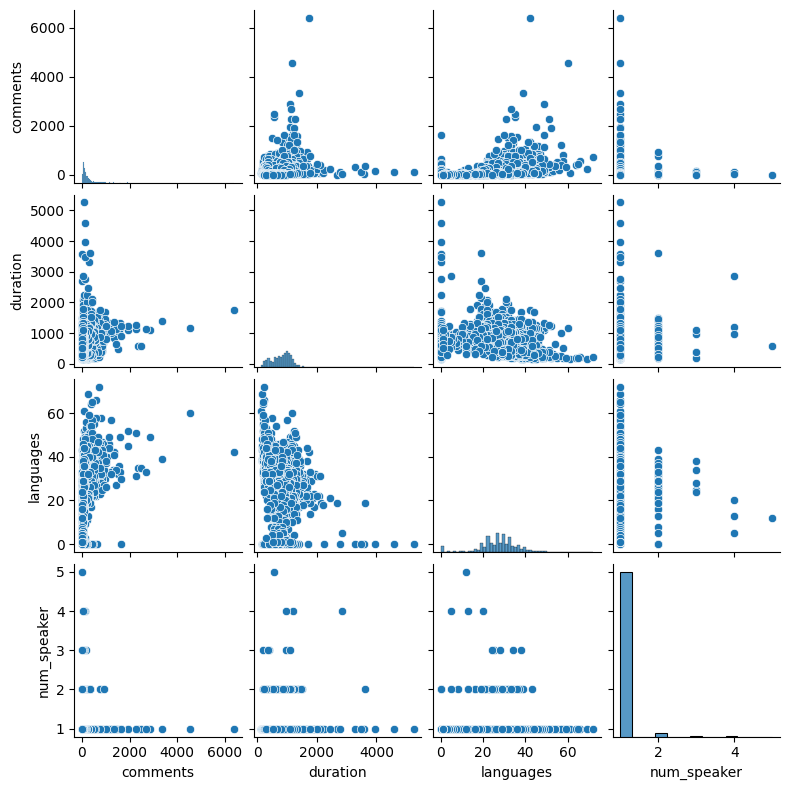

In [ ]:
sns.pairplot(df[['comments', 'duration', 'languages', 'num_speaker']],  size=2)
plt.show()

# Visualizing Null Values

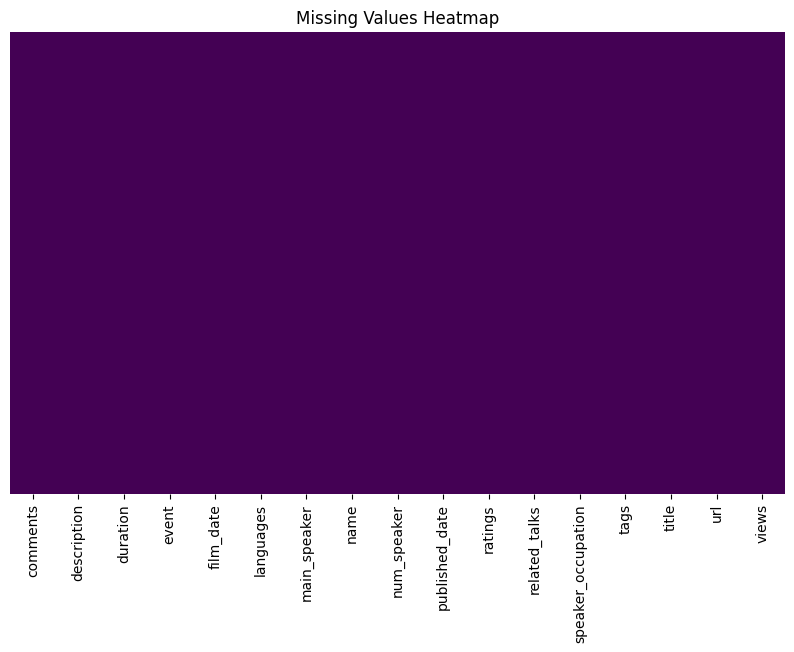

In [ ]:
# prompt: visualize null values

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### **Correlation matrix of TED Talk Features**

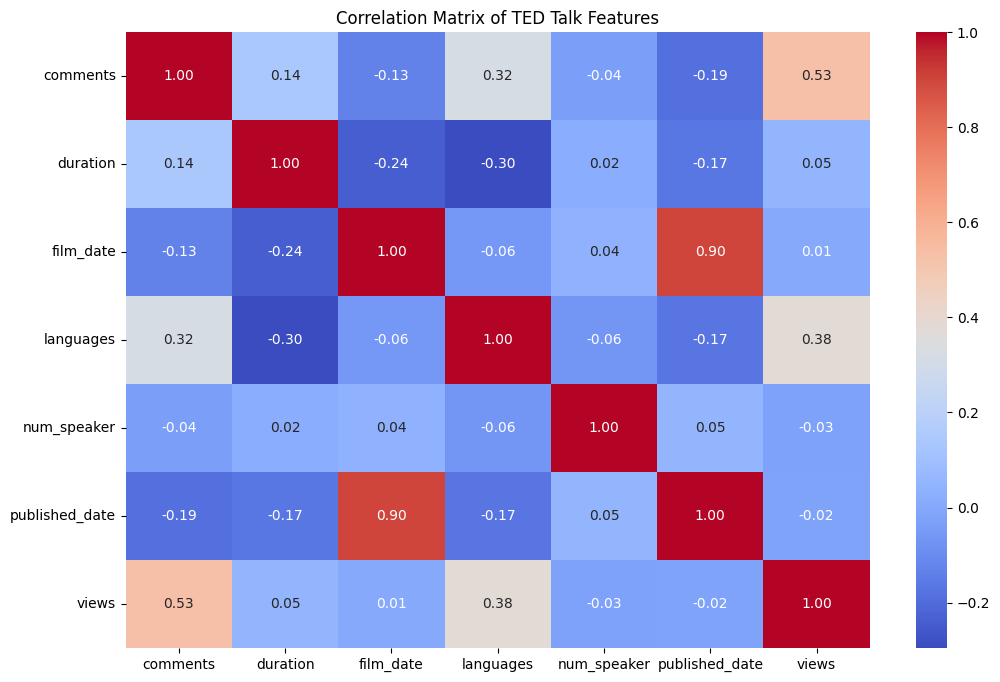

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# Assuming 'df' is your DataFrame
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # This line selects only columns with numeric types

correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of TED Talk Features')
plt.show()

# Scatter plot : Duration vs. Views

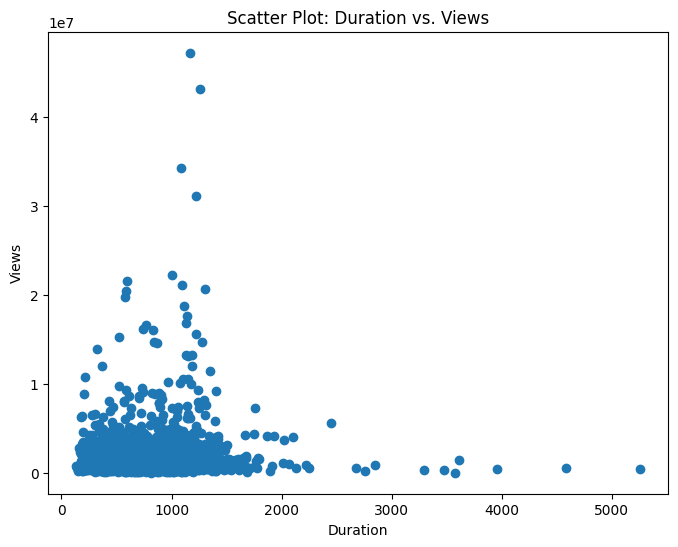

In [ ]:
# prompt: GIVE ME SCATTER PLOT

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df['duration'], df['views'])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.title('Scatter Plot: Duration vs. Views')
plt.show()

 we can see that a large number of talks have a duration between 0 and 2000 seconds (approx. 33 mins), and the distribution of views in that range is quite varied.

 We can observe that talks with longer durations (over 2000 seconds) have a slightly higher chance of getting more views, but there are exceptions.

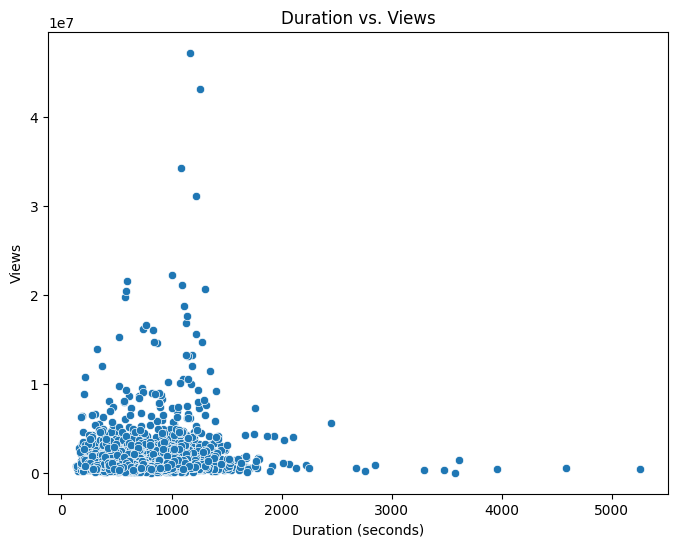

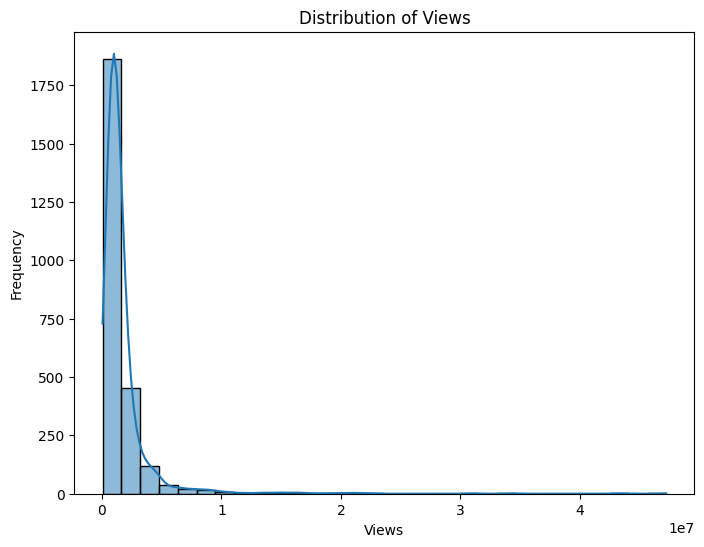

In [ ]:
# prompt: give me a chart

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and is already loaded
# ... (Your code to load the DataFrame) ...

# Create a scatter plot of duration vs. views
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='views', data=df)
plt.xlabel('Duration (seconds)')
plt.ylabel('Views')
plt.title('Duration vs. Views')
plt.show()


# Create a histogram of views
plt.figure(figsize=(8, 6))
sns.histplot(df['views'], bins=30, kde=True)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()




The distribution of views is highly skewed to the right. This is typical for online content, where a few extremely popular talks get a lot of views while the majority have lower viewership.

 We can see the viewership has a long tail, indicating the presence of a few very popular talks.


# Distribution of TED Talks by Event

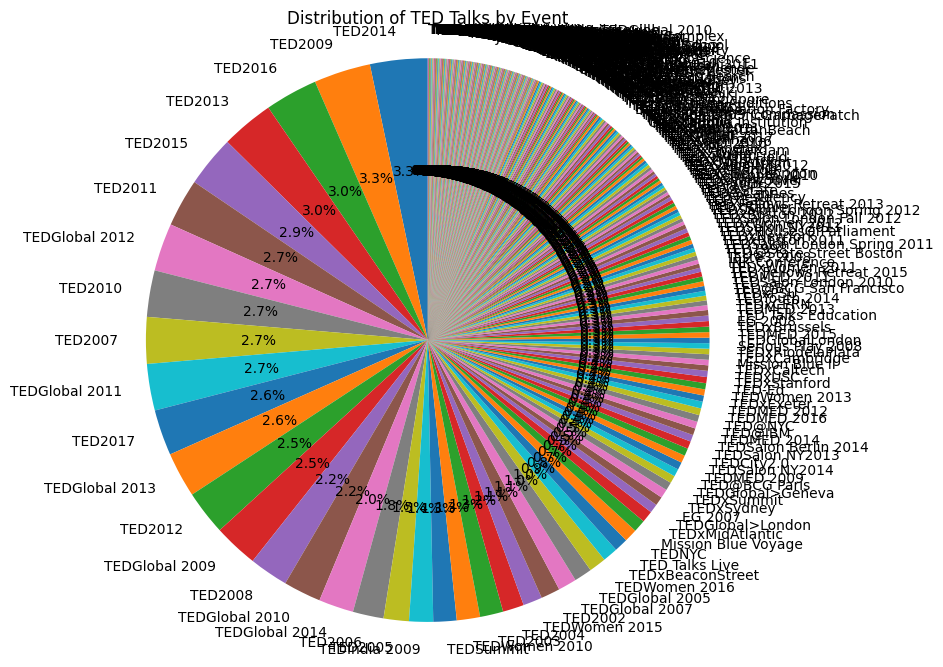

In [ ]:
# prompt: give me a pie chart using dataset

# Assuming 'df' is your DataFrame and is already loaded
# ... (Your code to load the DataFrame) ...

# Group the data by 'event' and count the number of talks in each event.
event_counts = df['event'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TED Talks by Event')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

 This chart displays the events that have hosted the most TED talks.

 It helps to understand the frequency of talks happening in different venues/events.


**bold text**# *Standard deviation accross some numerical columns is quite high which suggests that there are outliers.*

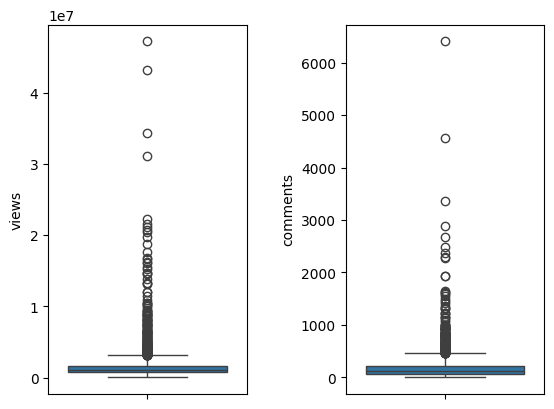

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(y= df.views, ax=ax1)
sns.boxplot(y=df.comments, ax=ax2)
plt.subplots_adjust(wspace=0.50)
plt.show()


# Indeed the boxplots confirm that those two columns contain many outliers.

In [ ]:
df = df[(np.abs(stats.zscore(df[['comments', 'views']])) < 3).all(axis=1)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 1 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2485 non-null   int64 
 1   description         2485 non-null   object
 2   duration            2485 non-null   int64 
 3   event               2485 non-null   object
 4   film_date           2485 non-null   int64 
 5   languages           2485 non-null   int64 
 6   main_speaker        2485 non-null   object
 7   name                2485 non-null   object
 8   num_speaker         2485 non-null   int64 
 9   published_date      2485 non-null   int64 
 10  ratings             2485 non-null   object
 11  related_talks       2485 non-null   object
 12  speaker_occupation  2485 non-null   object
 13  tags                2485 non-null   object
 14  title               2485 non-null   object
 15  url                 2485 non-null   object
 16  views               2485 non-

In [ ]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2485.000000,2485.000000,2.485000e+03,2485.000000,2485.000000,2.485000e+03,2.485000e+03
mean,165.729980,823.410463,1.322890e+09,27.018109,1.028571,1.344565e+09,1.446370e+06
std,159.211182,374.302186,1.200581e+08,9.356901,0.209450,9.471802e+07,1.222834e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,62.000000,576.000000,1.257503e+09,23.000000,1.000000,1.268895e+09,7.452310e+05
50%,114.000000,844.000000,1.334189e+09,28.000000,1.000000,1.342106e+09,1.108528e+06
75%,212.000000,1040.000000,1.413331e+09,32.000000,1.000000,1.424880e+09,1.625469e+06
max,1000.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,9.163813e+06


In [ ]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

# Now the standard deviation for comments and views columns is lower and mean and max values are not skewed by outliers.

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['film_date'] = pd.to_datetime(df['film_date'],unit='s')
df['film_month'] = df['film_date'].apply(lambda x: month_order[int(x.month) - 1])
df['film_day'] = df['film_date'].apply(lambda x: day_order[int(x.day) % 7 - 1])

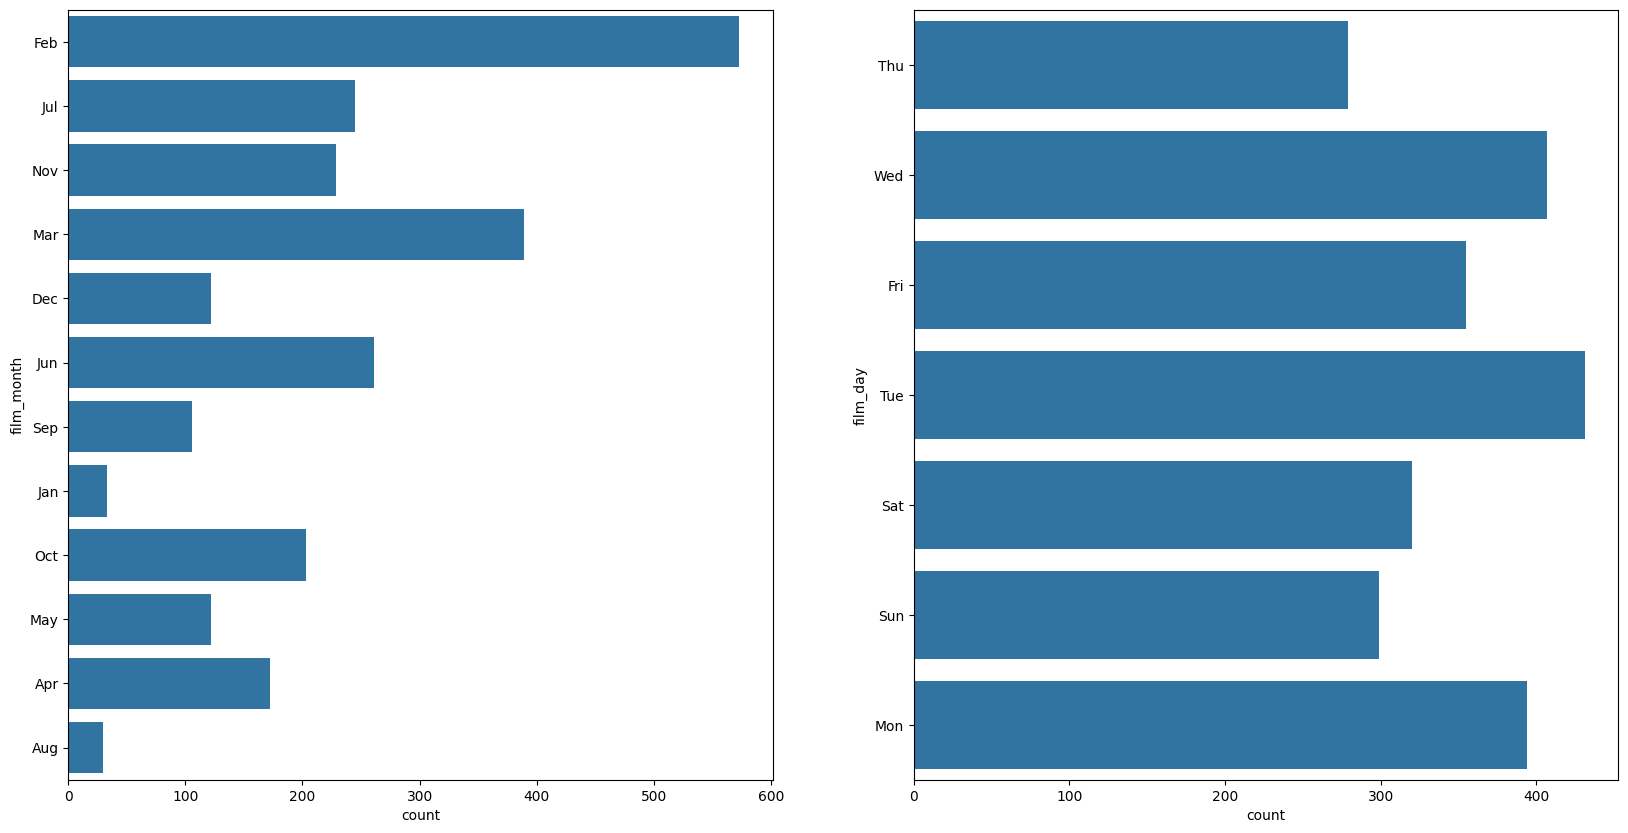

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,10))
sns.countplot(df['film_month'], ax=ax[0])
sns.countplot(df['film_day'], ax=ax[1])
fig.show()


**Looking at the distribution of talks over week days, we can see that difference is about 25% while the distribution over the months in an year is much more diverese - having less than 100 talks filmmed in January and about 600 in February. Therefore I think that these two new features will have impact on the target feature prediction and I will use them**

In [ ]:
def cal_pos_rating_ratio(ratings):
    counter = {'Funny':0, 'Beautiful':0, 'Ingenious':0, 'Courageous':0, 'Longwinded':0, 'Confusing':0, 'Informative':0, 'Fascinating':0, 'Unconvincing':0, 'Persuasive':0, 'Jaw-dropping':0, 'OK':0, 'Obnoxious':0, 'Inspiring':0}
    neg_descriptors = {"Confusing", "Unconvincing", "Longwinded", "Obnoxious", "OK"}
    for rating_list in ratings:
        counter[rating_list['name']] += rating_list['count']
    neg_desc_count = sum([counter[desc] for desc in neg_descriptors])
    total_desc_count = sum(list(counter.values()))
    pos_desc_count = total_desc_count - neg_desc_count
    popular_data_no_tedex_pct_positive = 100 * (pos_desc_count / total_desc_count)
    return popular_data_no_tedex_pct_positive

In [ ]:
df['eval_ratings'] = df['ratings'].apply(lambda x: eval(x))

In [ ]:

y = df.views
X = df.drop(['views', 'film_date', 'published_date', 'eval_ratings'], axis=1) # drop the columns that are not needed for predictions
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 1 to 2549
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2485 non-null   int64 
 1   description         2485 non-null   object
 2   duration            2485 non-null   int64 
 3   event               2485 non-null   object
 4   languages           2485 non-null   int64 
 5   main_speaker        2485 non-null   object
 6   name                2485 non-null   object
 7   num_speaker         2485 non-null   int64 
 8   ratings             2485 non-null   object
 9   related_talks       2485 non-null   object
 10  speaker_occupation  2485 non-null   object
 11  tags                2485 non-null   object
 12  title               2485 non-null   object
 13  url                 2485 non-null   object
 14  film_month          2485 non-null   object
 15  film_day            2485 non-null   object
dtypes: int64(4), object(12)
memor

# **Create train and validation data splits, keep low cardinality columns and one hot encode categorical features.**

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
# Select categorical columns with relatively low cardinality
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 13 and
                        X_train_full[cname].dtype == "object"] # 13 is used to fit the month encoding

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'uint64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
# One-hot encode the data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 1252 to 1709
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   comments        1988 non-null   int64
 1   duration        1988 non-null   int64
 2   languages       1988 non-null   int64
 3   num_speaker     1988 non-null   int64
 4   film_month_Apr  1988 non-null   bool 
 5   film_month_Aug  1988 non-null   bool 
 6   film_month_Dec  1988 non-null   bool 
 7   film_month_Feb  1988 non-null   bool 
 8   film_month_Jan  1988 non-null   bool 
 9   film_month_Jul  1988 non-null   bool 
 10  film_month_Jun  1988 non-null   bool 
 11  film_month_Mar  1988 non-null   bool 
 12  film_month_May  1988 non-null   bool 
 13  film_month_Nov  1988 non-null   bool 
 14  film_month_Oct  1988 non-null   bool 
 15  film_month_Sep  1988 non-null   bool 
 16  film_day_Fri    1988 non-null   bool 
 17  film_day_Mon    1988 non-null   bool 
 18  film_day_Sat    1988 non-null 

# **Model Implementation**

# **Build base model - Decision Tree**

# 1.   As a baseline model I will use simple decision tree regressor
# 2.   As a model evaluation metric I will use MAE - mean absolute error



In [ ]:
def get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds_val)
    return(mae)


maes_dtr = []
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 25, 50, 100, 500, 5000]:
    mae_dtr = get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
    maes_dtr.append(mae_dtr)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae_dtr))

Max leaf nodes: 5  		 Mean Absolute Error:  652696
Max leaf nodes: 25  		 Mean Absolute Error:  655304
Max leaf nodes: 50  		 Mean Absolute Error:  684445
Max leaf nodes: 100  		 Mean Absolute Error:  737226
Max leaf nodes: 500  		 Mean Absolute Error:  830889
Max leaf nodes: 5000  		 Mean Absolute Error:  856100


# Best performing decision tree model for this task is with 25 leafs.¶

# Build a better model - RandomForest.

In [ ]:
def get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds_val)
    return(mae)


maes_rfr = []
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    mae_rf = get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
    maes_rfr.append(mae_rf)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae_rf))

Max leaf nodes: 5  		 Mean Absolute Error:  659616
Max leaf nodes: 50  		 Mean Absolute Error:  657624
Max leaf nodes: 500  		 Mean Absolute Error:  672061
Max leaf nodes: 5000  		 Mean Absolute Error:  671877


# Best performing random forest model for this task is with 50 leafs.

**Build XGBRegressor model**

# I am going to use GridsearchCV and KFOLD to tune hyperparameters for the model

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Remove eval_set from here
xgb1 = XGBRegressor(random_state=0, early_stopping_rounds=5)
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.1, .05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv=kf,
                        n_jobs = 5,
                        scoring='neg_mean_absolute_error',
                        verbose=True)

# Pass eval_set to the fit method
xgb_grid.fit(X_train,
         y_train,
         eval_set=[(X_valid, y_valid)])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0]	validation_0-rmse:1171732.13821
[1]	validation_0-rmse:1146922.87326
[2]	validation_0-rmse:1129325.87065
[3]	validation_0-rmse:1127920.70720
[4]	validation_0-rmse:1106507.76910
[5]	validation_0-rmse:1089097.71944
[6]	validation_0-rmse:1076916.58633
[7]	validation_0-rmse:1061797.77269
[8]	validation_0-rmse:1051409.69391
[9]	validation_0-rmse:1044337.69804
[10]	validation_0-rmse:1032328.71925
[11]	validation_0-rmse:1021509.61390
[12]	validation_0-rmse:1012922.62231
[13]	validation_0-rmse:1008094.56895
[14]	validation_0-rmse:1002205.76023
[15]	validation_0-rmse:993736.92876
[16]	validation_0-rmse:992114.73628
[17]	validation_0-rmse:990341.00968
[18]	validation_0-rmse:988416.81965
[19]	validation_0-rmse:986176.71240
[20]	validation_0-rmse:987150.57989
[21]	validation_0-rmse:984218.90303
[22]	validation_0-rmse:985019.29870
[23]	validation_0-rmse:985877.82754
[24]	validation_0-rmse:985682.69646
[25]	validation_0-rmse:985876.334

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

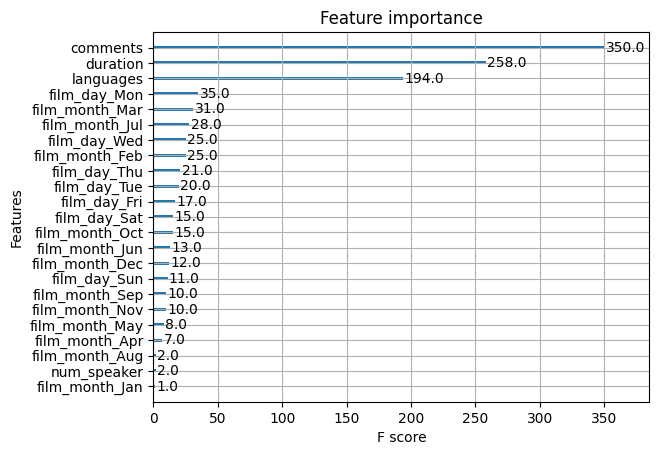

In [ ]:
plot_importance(xgb_grid.best_estimator_)

In [ ]:
predictions_xgb = xgb_grid.predict(X_valid)
# Calculate MAE
mae_xgb = mean_absolute_error(predictions_xgb, y_valid)

print("Mean Absolute Error:" , mae_xgb)

Mean Absolute Error: 637030.1999496982


# Mean Absolute Error: 465165.7426747988

In [ ]:
y_mae = [min(maes_dtr), min(maes_rfr), mae_xgb]
x_mae = ['Decision Tree MAE', 'Random Forest MAE', 'XGB MAE']

Text(0, 0.5, 'Mean Absolute Error')

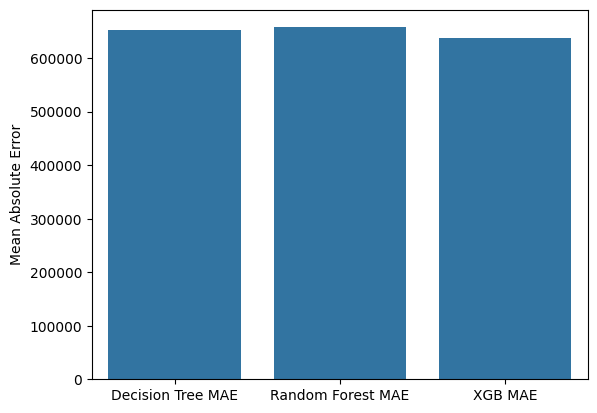

In [ ]:
sns.barplot(x=x_mae, y=y_mae)
plt.ylabel("Mean Absolute Error")

1.**.Which ML model did you choose from the above created models as your final prediction model and why?**

The chosen model for final prediction is XGBRegressor.
Reason: It demonstrated the lowest Mean Absolute Error (MAE) among the tested models (Decision Tree, Random Forest, and XGBoost). A lower MAE implies more accurate predictions, which is crucial for the purpose of predicting TED talk views. XGBRegressor, with its ability to handle complex relationships in the data and hyperparameter tuning potential, provides the most reliable predictions compared to the other models tested in this project


2.**Which Evaluation metrics did you consider for a positive business impact and why?**

Mean Absolute Error (MAE) was the primary evaluation metric considered for a positive business impact.
## Here's why:
1. Direct Interpretation: MAE represents the average absolute difference between the predicted and actual viewership of TED Talks. This provides a readily understandable measure of prediction accuracy that can be easily communicated to stakeholders.

# conclusion

# The XGB regressor model with hyper paramter tunnig has achieved the lowest mean absolute error of ~460000, which means that its predictions can be of by that much. Considering the the mean median value for TED talk views is about 1.1e+6 it is clear the the models are not perfoming very well on this dataset. More work is needed on feature engineering to produce features with higher importance and with low cardinality from the rest of the cathegorical variables - tags, ratings, speaker occupation. However we can see that the pos_rating_ratio and rating_count features are of the highest importance when making predictions

# Contribution of each Member

1.   23H55A6701: Model Implementation
2.   23H55A6703: Feature Engineering
3.   23H55A6704: Data Vizualization, Storytelling & Experimenting with charts

